In [26]:
# No sample adjustment - baseline logistic regression - MinMax tag data


In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# module for resampling
from sklearn.utils import resample

In [4]:
# os.getcwd()

In [5]:
# os.listdir(os.getcwd())

In [6]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [27]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [28]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 39624, dtype: int64

In [29]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive', 'negative', 'totaltags']  , axis=1)

In [30]:
x_data.shape

(39624, 343)

In [31]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [32]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [34]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [35]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

In [36]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.9823675886668013
Testing Data Score: 0.9809206541490006


In [37]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9701
           1       0.69      0.14      0.23       205

    accuracy                           0.98      9906
   macro avg       0.84      0.57      0.61      9906
weighted avg       0.98      0.98      0.97      9906



In [25]:
# thinking about baseline results:
# Support is not balanced - 9700 fail cases vs 205 success
# Percision: for no success: 98%, for successful games: 70%
# Recall: Fraction of positives found, 100% for 0, 15% for 1
# f1 score: 98% due to overfitting on failure cases

<AxesSubplot:>

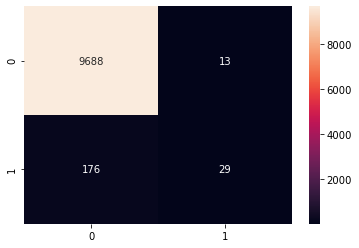

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled )
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [39]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(343,) (1, 343)
(343,)


,0,1
138,tagsingleplayer,5.602372
3,tagaction,4.960205
59,tagopenworld,4.175923
8,tagrpg,3.305336
4,tagadventure,3.182212
86,taggreatsoundtrack,3.075987
54,tagcoop,3.050317
84,tagmmorpg,3.036610
10,tagindie,2.990034
105,tagmultiplayer,2.655511
